<a href="https://colab.research.google.com/github/ArceusOmkar7/jupyter-notebooks/blob/main/Income_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
df = fetch_openml(data_id=45068, as_frame=True).frame

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,19,134974.0,10,0.0,0.0,20,nan,Some-college,Never-married,nan,Own-child,White,Female,United-States,<=50K
1,41,195096.0,13,0.0,0.0,50,Self-emp-inc,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
2,31,152109.0,9,0.0,0.0,50,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Male,United-States,<=50K
3,40,202872.0,12,0.0,0.0,45,Private,Assoc-acdm,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,35,98989.0,5,0.0,0.0,38,nan,9th,Divorced,nan,Own-child,Amer-Indian-Eskimo,Male,United-States,<=50K


# Annual income class prediction using various socio-economic features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   fnlwgt          48842 non-null  float64 
 2   education-num   48842 non-null  int64   
 3   capital-gain    48842 non-null  float64 
 4   capital-loss    48842 non-null  float64 
 5   hours-per-week  48842 non-null  int64   
 6   workclass       48842 non-null  category
 7   education       48842 non-null  category
 8   marital-status  48842 non-null  category
 9   occupation      48842 non-null  category
 10  relationship    48842 non-null  category
 11  race            48842 non-null  category
 12  sex             48842 non-null  category
 13  native-country  48842 non-null  category
 14  class           48842 non-null  object  
dtypes: category(8), float64(3), int64(3), object(1)
memory usage: 3.0+ MB


**`fnlwgt` is a similarity feature**
- *People with similar demographic characteristics should have similar weights*
- Further it is state dependent which can add a level of noise for training, so we will drop it

In [ ]:
df = df.drop(columns=['fnlwgt'])

- We can see this shows that there are no null values.
- But in the `df.head()` we can see that there are nan in occupation, workclass

In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
nan,2809
Transport-moving,2355


In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
nan,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
for col in df.columns:
  print((df[col] == 'nan').value_counts())
  print()

age
False    48842
Name: count, dtype: int64

education-num
False    48842
Name: count, dtype: int64

capital-gain
False    48842
Name: count, dtype: int64

capital-loss
False    48842
Name: count, dtype: int64

hours-per-week
False    48842
Name: count, dtype: int64

workclass
False    46043
True      2799
Name: count, dtype: int64

education
False    48842
Name: count, dtype: int64

marital-status
False    48842
Name: count, dtype: int64

occupation
False    46033
True      2809
Name: count, dtype: int64

relationship
False    48842
Name: count, dtype: int64

race
False    48842
Name: count, dtype: int64

sex
False    48842
Name: count, dtype: int64

native-country
False    47985
True       857
Name: count, dtype: int64

class
False    48842
Name: count, dtype: int64



For the missing values:
- **Occupation and Workclass**, these seems correlated and important features, so it won't be any good to drop instances with their missing values. Also, they are already imputed to `nan`
- As for the missing values for native-country (i.e 857), we will impute it with the Mode which will be USA

In [ ]:
df['race'].value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [ ]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,19,10,0.0,0.0,20,nan,Some-college,Never-married,nan,Own-child,White,Female,United-States,<=50K
1,41,13,0.0,0.0,50,Self-emp-inc,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
2,31,9,0.0,0.0,50,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Male,United-States,<=50K
3,40,12,0.0,0.0,45,Private,Assoc-acdm,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,35,5,0.0,0.0,38,nan,9th,Divorced,nan,Own-child,Amer-Indian-Eskimo,Male,United-States,<=50K


<BarContainer object of 2 artists>

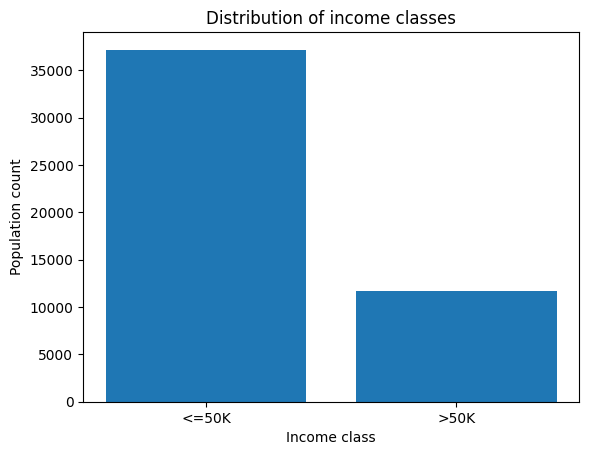

In [ ]:
counts = df['class'].value_counts()
# plt.figure(figsize=(10, 8))
plt.title("Distribution of income classes")
plt.xlabel('Income class')
plt.ylabel('Population count')
plt.bar(counts.index, counts.values)

It can be observed that the data is very skewed right towards `50k`

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

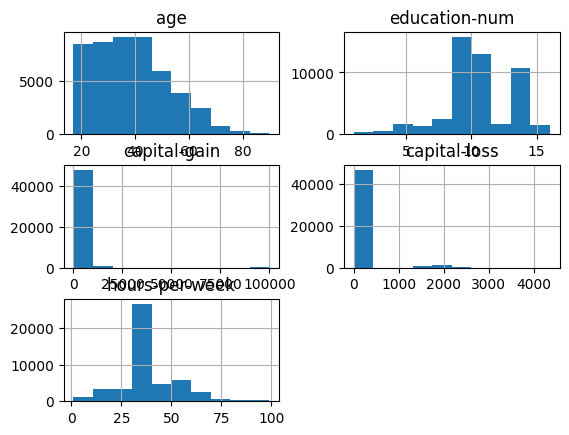

In [ ]:
df.hist()

- We can observe that the distribution of **age** is right skewed, telling us that we have more data of comparitievely younger population.
- For the **capital gain and loss** we can observe extreme right skewness or zero inflated.
- Both have common right skewness indicating that most of the population have zero capital gain/loss while some have very high capital gain/loss comparitively.
- The **hours-per-week** distribution peaked at around 40 hours with some right skewness.

For further analysis we will encode the categorical classes

### Column transforming pipeline

We will drop the `education` features as we are given education-num already encoded

In [ ]:
education_mapping_df = df[['education', 'education-num']].copy()

education_mapping_df = education_mapping_df.drop_duplicates().reset_index(drop=True)

education_lookup = pd.Series(education_mapping_df.education.values,
                             index=education_mapping_df['education-num']).to_dict()

print("Education Mapping (education-num -> education name):")
for num in sorted(education_lookup.keys()):
    print(f"{num}: {education_lookup[num]}")

Education Mapping (education-num -> education name):
1: Preschool
2: 1st-4th
3: 5th-6th
4: 7th-8th
5: 9th
6: 10th
7: 11th
8: 12th
9: HS-grad
10: Some-college
11: Assoc-voc
12: Assoc-acdm
13: Bachelors
14: Masters
15: Prof-school
16: Doctorate


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

numeric_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
non_ordinal_categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# using dense array instead of sparse matrix to have more compatability, as this much overhead can be handleed easily
# categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# But is is slower for SVMs (SVC)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, non_ordinal_categorical_features)
    ]
)

## Model selection

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'])
y = df['class']

# as both classes dont have same value counts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39073, 13)
X_test shape: (9769, 13)
y_train shape: (39073,)
y_test shape: (9769,)


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline(
      steps=[
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=1000))
      ]
    )

print("Training model...")
model = model_pipeline.fit(X_train, y_train)
print("Model trained")

print("Calculating accuracy score...")
score = model.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Training model...
Model trained
Calculating accuracy score...
Model Accuracy: 0.8420513870406388


### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# choosed 15 randomly as the data points are more
model_pipeline = Pipeline(
      steps=[
          ('preprocessor', preprocessor),
          ('classifier', KNeighborsClassifier(n_neighbors=15))
      ]
    )

print("Training model...")
# model = model_pipeline.fit(X_train, y_train)
print("Model trained")

print("Calculating accuracy score...")
# score = model.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Training model...
Model trained
Calculating accuracy score...
Model Accuracy: 0.8420513870406388


### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_pipeline = Pipeline(
      steps=[
          ('preprocessor', preprocessor),
          ('classifier', RandomForestClassifier())
      ]
    )

print("Training model...")
# model = model_pipeline.fit(X_train, y_train)
print("Model trained")

print("Calculating accuracy score...")
# score = model.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Training model...
Model trained
Calculating accuracy score...
Model Accuracy: 0.8420513870406388


### SVM

In [ ]:
from sklearn.svm import SVC

model_pipeline = Pipeline(
      steps=[
          ('preprocessor', preprocessor),
          ('classifier', SVC())
      ]
    )

print("Training model...")
# model = model_pipeline.fit(X_train, y_train)
print("Model trained")

print("Calculating accuracy score...")
# score = model.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Training model...
Model trained
Calculating accuracy score...
Model Accuracy: 0.8420513870406388


We will move further with Logistic Regression and SVC

Before that lets install CUML as it can run the model training on GPU which will help in the CVs

## SVC

In [ ]:
from sklearn.svm import SVC
model_pipeline = Pipeline(
      steps=[
          ('preprocessor', preprocessor),
          ('classifier', SVC())
      ]
    )

print("Training model...")
model = model_pipeline.fit(X_train, y_train)
print("Model trained")

print("Calculating accuracy score...")
score = model.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Training model...
Model trained
Calculating accuracy score...
Model Accuracy: 0.8512642030914116


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

svc_model_pipeline = Pipeline(
      steps=[
          ('preprocessor', preprocessor),
          ('classifier', SVC(random_state=42))
      ]
    )

param_dist_svc = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
    'classifier__kernel': ['rbf', 'linear']
}

# as space of parameter is 32 max
n_iterations = 32

random_search_svc = RandomizedSearchCV(estimator=svc_model_pipeline,
                             param_distributions=param_dist_svc,
                             n_iter=n_iterations,
                             cv=3,
                             scoring='accuracy',
                             verbose=2,
                             n_jobs=-1,
                             random_state=42
                                     )


print(f"Starting RandomizedSearchCV for SVC ({n_iterations} iterations)...")
# random_search_svc.fit(X_train, y_train)
print("RandomizedSearchCV finished.")

Starting RandomizedSearchCV for SVC (32 iterations)...
RandomizedSearchCV finished.


In [ ]:
print("\nBest parameters found by RandomizedSearchCV:")
# print(random_search_svc.best_params_)

print("\nBest cross-validation accuracy score:")
# print(f"{random_search_svc.best_score_:.4f}")


Best parameters found by RandomizedSearchCV:


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

## Logistic Regression

In [ ]:
import numpy as np
from scipy.stats import loguniform

log_reg_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]
)

param_dist_log_reg = {
    'classifier__C': loguniform(0.01, 100), # Using loguniform distribution
    'classifier__penalty': ['l1', 'l2'],
    # Line length for solver list is acceptable.
    'classifier__solver': ['liblinear', 'saga']
}

n_iterations = 50

random_search_logreg = RandomizedSearchCV(
    estimator=log_reg_pipeline,
    param_distributions=param_dist_log_reg,
    n_iter=n_iterations,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print(f"Starting RandomizedSearchCV for Logistic Regression ({n_iterations} iterations)...")
random_search_logreg.fit(X_train, y_train)
print("RandomizedSearchCV finished.")

Starting RandomizedSearchCV for Logistic Regression (50 iterations)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV finished.


In [ ]:
print("\nBest parameters found by RandomizedSearchCV:")
print(random_search_logreg.best_params_)

print("\nBest cross-validation accuracy score:")
# f-string formatting for the score is good practice.
print(f"{random_search_logreg.best_score_:.4f}")


Best parameters found by RandomizedSearchCV:
{'classifier__C': np.float64(0.012087541473056965), 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}

Best cross-validation accuracy score:
0.8423


In [ ]:
import joblib
joblib.dump(random_search_logreg.best_estimator_, 'best_log_reg_model.joblib')

['best_log_reg_model.joblib']

### Training on the full train set

In [ ]:
random_search_logreg.best_estimator_['classifier']

LogisticRegression(C=np.float64(0.012087541473056965), max_iter=1000,
                   random_state=42, solver='saga')

In [ ]:
# model_pipeline = Pipeline(
#       steps=[
#           ('preprocessor', preprocessor),
#           ('classifier', LogisticRegression(c=, penalty=))
#       ]
#     )
random_search_logreg.best_estimator_.get_params
print("Training model...")
model = random_search_logreg.best_estimator_.fit(X_train, y_train)
print("Model trained")

print("Calculating accuracy score...")
score = random_search_logreg.best_estimator_.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Training model...


KeyboardInterrupt: 

To conclude we can see that we got the best accuracy from `Logistic Regression Model`, which is 84.23%.

In [ ]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,19,10,0.0,0.0,20,nan,Some-college,Never-married,nan,Own-child,White,Female,United-States,<=50K
1,41,13,0.0,0.0,50,Self-emp-inc,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
2,31,9,0.0,0.0,50,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Male,United-States,<=50K
3,40,12,0.0,0.0,45,Private,Assoc-acdm,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,35,5,0.0,0.0,38,nan,9th,Divorced,nan,Own-child,Amer-Indian-Eskimo,Male,United-States,<=50K


In [ ]:
df['class'].value_counts()

,count
class,
<=50K,37155
>50K,11687


In [ ]:
temp = pd.DataFrame(np.array([75, 16, 2500, 0, 90, 'Private', '', 'Never-married', '', '', 'Black', 'Female', '', '']).reshape(1, -1), columns=df.columns)

In [ ]:
temp

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,75,16,2500,0,90,Private,,Never-married,,,Black,Female,,


In [ ]:
pred = random_search_logreg.best_estimator_.predict_proba(temp)

In [ ]:
pred

array([[0.73337909, 0.26662091]])

In [ ]:
best_pipeline = random_search_logreg.best_estimator_
log_reg_model = best_pipeline.named_steps['classifier']
preprocessor = best_pipeline.named_steps['preprocessor']

try:
    # For ColumnTransformer with transformers explicitly named:
    numeric_features_out = best_pipeline.named_steps['preprocessor'].transformers_[0][2] # Original names
    # Get OHE feature names (may vary slightly based on scikit-learn version)
    ohe_feature_names = best_pipeline.named_steps['preprocessor'].transformers_[1][1]\
        .get_feature_names_out(input_features=non_ordinal_categorical_features) # Use the original cat feature list fed to OHE
    # Combine them in the correct order
    processed_feature_names = list(numeric_features_out) + list(ohe_feature_names)
except Exception as e:
    print(f"Error getting feature names automatically: {e}")
    print("You might need to manually construct the feature name list based on your preprocessor steps.")
    processed_feature_names = None # Set to None if error occurs

if processed_feature_names and hasattr(log_reg_model, 'coef_'):
    # --- Get Coefficients ---
    # coef_ is often shape (1, n_features) for binary classification
    coefficients = log_reg_model.coef_[0]

    # --- Create a DataFrame for better visualization ---
    feature_importance = pd.DataFrame({
        'Feature': processed_feature_names,
        'Coefficient': coefficients
    })

    # Calculate absolute coefficients for sorting
    feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

    print("Feature Importances (Logistic Regression Coefficients):")
    print(feature_importance.head(20)) # Print top N features

    # --- Group importance for original categorical features (Example for 'workclass') ---
    # Find all columns related to 'workclass'
    # workclass_cols = [col for col in processed_feature_names if col.startswith('workclass_')] # Adjust prefix if needed
    # workclass_importance = feature_importance[feature_importance['Feature'].isin(workclass_cols)]['Abs_Coefficient'].sum()
    # print(f"\nApproximate combined importance for 'workclass': {workclass_importance}")
    # (Repeat for other categorical features)

else:
    print("Could not retrieve coefficients or feature names.")

Feature Importances (Logistic Regression Coefficients):
                              Feature  Coefficient  Abs_Coefficient
1                        capital-gain     1.779285         1.779285
29          occupation_Prof-specialty     1.110726         1.110726
15  marital-status_Married-civ-spouse     1.101730         1.101730
23         occupation_Exec-managerial     0.956615         0.956615
40                  relationship_Wife     0.881486         0.881486
27           occupation_Other-service    -0.737197         0.737197
24         occupation_Farming-fishing    -0.710360         0.710360
38             relationship_Own-child    -0.634589         0.634589
17       marital-status_Never-married    -0.603619         0.603619
25       occupation_Handlers-cleaners    -0.560387         0.560387
32            occupation_Tech-support     0.515884         0.515884
26       occupation_Machine-op-inspct    -0.463223         0.463223
73              native-country_Mexico    -0.442137         0

This project successfully developed a machine learning pipeline to predict income class from the Adult dataset.
**Key steps included**:
- Robust preprocessing using ColumnTransformer to handle missing values
- Encode categorical features (notably using One-Hot Encoding for nominal and leveraging education-num for ordinal)
- Scale numerical features.

After evaluating models like Logistic Regression and SVC, hyperparameter tuning via RandomizedSearchCV identified an optimized **Logistic Regression** model achieving approximately **84% accuracy**.

Feature analysis revealed that capital-gain, specific occupation categories, and marital-status (particularly 'Married-civ-spouse') were the most influential predictors of income exceeding $50K.